# I. Import Data and Libraries

Like always, the first thing that we need to do is importing libraries that we need. We import Numpy as our tool for doing Linear Algebra, and pandas as our main tool for data processing. Later, we will import other libraries. But we would just do that as we were working. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nba2k20-player-dataset/nba2k20-full.csv


Now, we are looking at the data. See how the data really looks like and try to catch some information that might be beneficial later on. 

In [2]:
data = pd.read_csv('/kaggle/input/nba2k20-player-dataset/nba2k20-full.csv')
data.head(3)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN


We can see that we don't have information about **age**. But  we have information about the players birthday. There is no way we can use the information of birthday for analysis, so we need to convert this first. Also, the **salary** information that we have here doesn't seem like in the *integer* or *float* format (we can see it at the dollar sign in the first letter of each salary rows). We need to convert it to *integer* format after throwing awayd the dollar sign.

There are data about **height** and **weight**. But both height and weight are showed in two metrics. We don't need all this information and we will just be using the international format which is meter for height and kilogram for weight. 

In [3]:
data['age'] = [20 + (100 - int(x.split('/')[-1])) for x in data.b_day]
data['salary'] = [int(x.split('$')[1]) for x in data.salary]
data['height'] = [float(x.split('/')[-1]) for x in data.height]
data['weight'] = [float(x.split('/')[-1].split(' ')[1]) for x in data.weight]

Now, we will see how many rows that this data has. Also, we need to know about how many null data there is. 

In [4]:
print('THERE ARE', len(data), 'ROWS OF DATA\n\n')
data.info()

THERE ARE 429 ROWS OF DATA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   full_name    429 non-null    object 
 1   rating       429 non-null    int64  
 2   jersey       429 non-null    object 
 3   team         406 non-null    object 
 4   position     429 non-null    object 
 5   b_day        429 non-null    object 
 6   height       429 non-null    float64
 7   weight       429 non-null    float64
 8   salary       429 non-null    int64  
 9   country      429 non-null    object 
 10  draft_year   429 non-null    int64  
 11  draft_round  429 non-null    object 
 12  draft_peak   429 non-null    object 
 13  college      363 non-null    object 
 14  age          429 non-null    int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 50.4+ KB


# II. Exploratory Data Analysis (EDA)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 30.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1296x504 with 0 Axes>

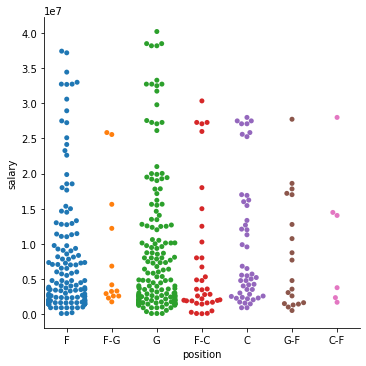

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 7))
sns.catplot(kind='swarm', data=data, x='position', y='salary')

We can see from the graph above that **Guard** is the most popular position. The player with the highest paid also is positioned as **Guard**. But, if we only look at the data, every positions seem like having the same average. Let's see.

In [6]:
data[['position', 'salary']].groupby('position').mean().sort_values('salary', ascending=False)

,salary
position,
C-F,1.071391e+07
C,9.873413e+06
G,8.717699e+06
G-F,8.396853e+06
F-G,8.367301e+06
F,8.046885e+06
F-C,7.475577e+06


From the table above, we could see that **C-F** is a position with the highest paid. But from the graph that was showed previously, we know that **C-F** (which possibly is Central Forward, I don't even know because I am not a basketball fan myself) is the least favourite position. There are only six players that has this role. Maybe that is because this position is not very popular and also if a team needs a player to play on this position, they will just play players from different position that can play good enough to fill that position. 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Golden State Warriors'),
  Text(1, 0, 'Los Angeles Clippers'),
  Text(2, 0, 'Portland Trail Blazers'),
  Text(3, 0, 'Miami Heat'),
  Text(4, 0, 'Houston Rockets')])

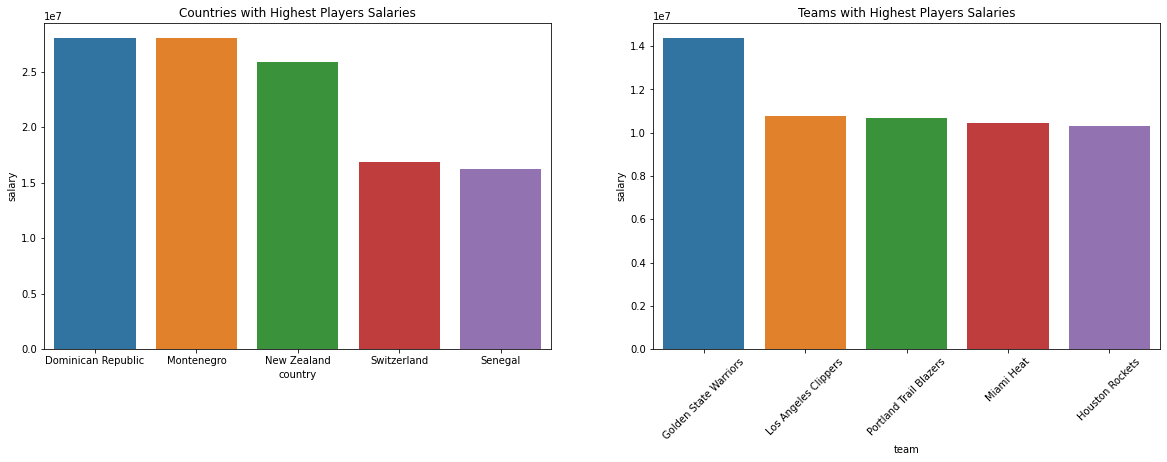

In [7]:
dx = data[['team', 'salary']].groupby('team').mean().sort_values('salary', ascending=False).reset_index().head(5)
dy = data[['country', 'salary']].groupby('country').mean().sort_values('salary', ascending=False).reset_index().head(5)

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].set_title('Countries with Highest Players Salaries')
sns.barplot(x=dy.country, y=dy.salary, ax=ax[0])
ax[1].set_title('Teams with Highest Players Salaries')
sns.barplot(x=dx.team, y=dx.salary, ax=ax[1])
plt.xticks(rotation=45)

As we can see above, Golden State Warriors is the team with the highest salary average. 

Then, players from **Dominican Republic** and **Montenegro** are paid highest than players from other countries. *Isn't it suspicious?*

In [8]:
data[(data.country == 'Dominican Republic') | (data.country == 'Montenegro')]

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,age
37,Nikola Vucevic,86,#9,Orlando Magic,C,10/24/90,2.11,108.9,28000000,Montenegro,2011,1,16,USC,30
44,Al Horford,85,#42,Philadelphia 76ers,C-F,06/03/86,2.06,111.6,28000000,Dominican Republic,2007,1,3,Florida,34


The table above explain it all. There are only one player from **Montenegro** and **Dominican Republic** and they probably are elite players. That is why Montenegro and Dominican Republic can have highest average at players salaries because they only have one player at NBA each. 

# III. Model Building

We will be converting some data to another form, so we can calculate them later. More like **Label Encoder**. But, we won't use the Label Encoder that is featured in **sklearn**. We would be using our own. The reason behind of that is because we want to make the calculation as linear as possible. All contributing factors that attribute the target value should be linear to the target. This couldn't happen if we were using Label Encoder from sklearn. 

The we do that is by grouping the data in the column, and calculate the average of the target based on each group. Let's say that You have *country* data. We will group every players based on their countries and then find out which country has the highest salary average. That country will be labeled as the highest number, and the country that has the lowest salary average would be labeled as 0.  

In [9]:
def convert_cat(x, y):
    df = pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis=1)
    df.columns = ['x', 'y']
    out_df = pd.DataFrame()
    out_df['names'] = df.groupby(['x']).mean().sort_values('y', ascending=True).index
    out_df['nums'] = np.arange(len(out_df))
    return out_df

def the_encoder(table, df):
    output = []
    for dfx, n in zip(df, df.isnull()):
        if n == True:
            o = 0
        else:
            o = int(table[table.names == dfx].nums)
        output.append(o)
    return output

In [10]:
position = convert_cat(data.position, data.salary)
team = convert_cat(data.team, data.salary)
country = convert_cat(data.country, data.salary)
college = convert_cat(data.college, data.salary)
draft_round = convert_cat(data.draft_round, data.salary)
draft_peak = convert_cat(data.draft_peak, data.salary)

We will now choose the most important features of the data to make predictions. There is no way we will be using all the features/columns of data that we have. Also, because now all the choosen data are in numbers, we can treat them all similarly. We will use **Min-Max Scaler** to scale them into 0 to 1 range. This range will make it easier for the machine to do calculation. 

In [11]:
# important columns = rating, team, position, height, weight, country, draft_year, draft_round, draft_peak, college, age
# target ==> salary

new_df = pd.concat([data.rating, data.height, data.weight, data.draft_year, data.age],axis=1)
new_df['position'] = the_encoder(position, data.position)
new_df['team'] = the_encoder(team, data.team)
new_df['country'] = the_encoder(country, data.country)
new_df['college'] = the_encoder(college, data.college)
new_df['draft_round'] = the_encoder(draft_round, data.draft_round)
new_df['draft_peak'] = the_encoder(draft_peak, data.draft_peak)
new_df['salary'] = data.salary

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaler_salary = MinMaxScaler()

new_df_train = new_df.drop(['salary'], axis=1)
new_df_test = new_df.salary

new_df_train_scaled = pd.DataFrame(mm_scaler.fit_transform(new_df_train), columns=new_df_train.columns)
new_df_test_scaled = pd.DataFrame(mm_scaler_salary.fit_transform(np.array(new_df_test).reshape(-1, 1)))

x_train, x_test, y_train, y_test = train_test_split(new_df_train_scaled, new_df_test_scaled, test_size=0.2)

In this small project, we will only use four models that we later will compare their performances. Those models are 
1. Neural Network
2. Support Vector Machine
3. Ada Boost 
4. Random Forest

The Neural network we will only use one-layer with 20 nodes on it. All activation layers are in **ReLU** (Rectified Linear Unit). We use **RMSProp** as the optimizer and **mean absolute error** as the loss function. 

For the other model, we will only use their default settings from sklearn. 

In [13]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='rmsprop', metrics=['mae'], loss='mae')

In [14]:
model.fit(x_train, y_train, batch_size=10, epochs=80)

Epoch 1/80
35/35 [==============================] - 1s 1ms/step - loss: 0.2172 - mae: 0.2172
Epoch 2/80
35/35 [==============================] - 0s 1ms/step - loss: 0.2109 - mae: 0.2109
Epoch 3/80
35/35 [==============================] - 0s 964us/step - loss: 0.2181 - mae: 0.2181
Epoch 4/80
35/35 [==============================] - 0s 1ms/step - loss: 0.2124 - mae: 0.2124
Epoch 5/80
35/35 [==============================] - 0s 1ms/step - loss: 0.2390 - mae: 0.2390
Epoch 6/80
35/35 [==============================] - 0s 1ms/step - loss: 0.2374 - mae: 0.2374
Epoch 7/80
35/35 [==============================] - 0s 1ms/step - loss: 0.2273 - mae: 0.2273
Epoch 8/80
35/35 [==============================] - 0s 1ms/step - loss: 0.2088 - mae: 0.2088
Epoch 9/80
35/35 [==============================] - 0s 997us/step - loss: 0.2138 - mae: 0.2138
Epoch 10/80
35/35 [==============================] - 0s 1ms/step - loss: 0.2445 - mae: 0.2445
Epoch 11/80
35/35 [==============================] - 0s 1ms/step 

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor

ml_models = [SVR(), AdaBoostRegressor(), RandomForestRegressor()]
the_scores_scaled = []
the_scores_real = []

target_real = mm_scaler_salary.inverse_transform(np.array(y_test).reshape(-1, 1))

for m in ml_models:
    the_model = m.fit(x_train, y_train)
    
    prediction = the_model.predict(x_test)
    prediction_real = mm_scaler_salary.inverse_transform(np.array(prediction).reshape(-1, 1))
    
    add_value_scaled = mean_absolute_error(y_test, prediction)
    add_value_real = mean_absolute_error(target_real, prediction_real)
    
    the_scores_scaled.append(add_value_scaled)
    the_scores_real.append(add_value_real)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


In [16]:
nn_prediction_scaled = model.predict(x_test)
nn_prediction_real = mm_scaler_salary.inverse_transform(nn_prediction_scaled)

the_scores_scaled.append(mean_absolute_error(nn_prediction_scaled, y_test))
the_scores_real.append(mean_absolute_error(nn_prediction_real, target_real))

df_scores = pd.DataFrame()
df_scores['MAE_scaled'] = the_scores_scaled
df_scores['MAE_real'] = the_scores_real
df_scores.index = ['SVM', 'Ada Boost', 'Random Forest', '1 Layer Neural Network']

Below is the score that we get from our findings. 

In [17]:
df_scores

,MAE_scaled,MAE_real
SVM,0.080047,3.216433e+06
Ada Boost,0.085761,3.446009e+06
Random Forest,0.066774,2.683096e+06
1 Layer Neural Network,0.158451,6.366855e+06


# IV. Conclusions
Now, we can see that the best model to do this prediction is **Random Forest Regressor** with default sklearn format compared to SVM, Neural Network or Ada Boost.